<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/4_Decision_Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision support -- Decision Trees

This notebook is merely a summary of the discussion of decision trees and there visualization opportunities found [here](https://mljar.com/blog/visualize-decision-tree/).

Decision trees can be used in classification tasks (response is a class) and in regression tasks (response is numerical).

## Decision Trees in Classification

We use the Iris dataset and train a classifier. Note that we skip the splitting in training and test datasets and the accuracy assessment here.

Import the necessary libraries.

In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Load the Iris dataset.

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Train the classifier with default hyper-parameters.

In [10]:
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

Show a text representation of the tree.


In [11]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Visualize the tree.

Therefore, we need to install the dtreeviz library before we can import it.

In [12]:
import sys
!pip install -q dtreeviz

In [13]:
import dtreeviz

Now we are ready to visualize and understand the decision tree model.

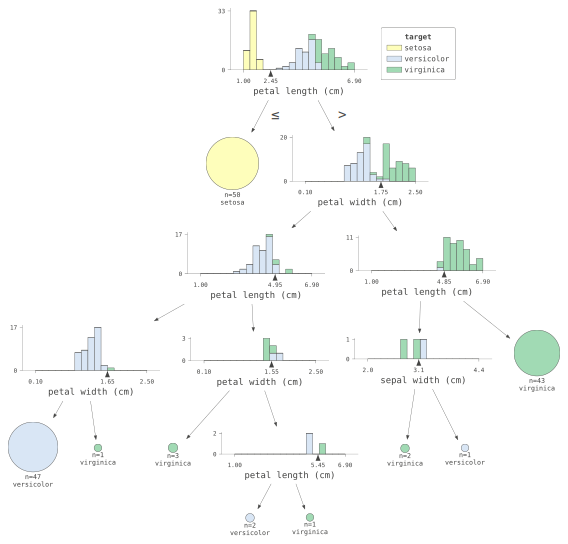

In [14]:
viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz.view(fontname="monospace")

## Decision Trees in Regression

We use the Boston dataset to train a regression model.

Import the additional libraries necessary.

In [15]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

Load the dataset.

In [17]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = df.drop(['B'], axis=1)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,14.81,16.6


In [18]:
X = df.drop('MEDV',axis=1)
y =df['MEDV']

Train the decision tree regression model.

In [19]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

Show a text representation of the tree.

In [20]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.03]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_0 <= 7.39
|   |   |   |--- value: [33.24]
|   |   |--- feature_0 >  7.39
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_0 <= 2.74
|   |   |   |--- value: [45.90]
|   |   |--- feature_0 >  2.74
|   |   |   |--- value: [21.90]



Visualize and understand the regression tree model.

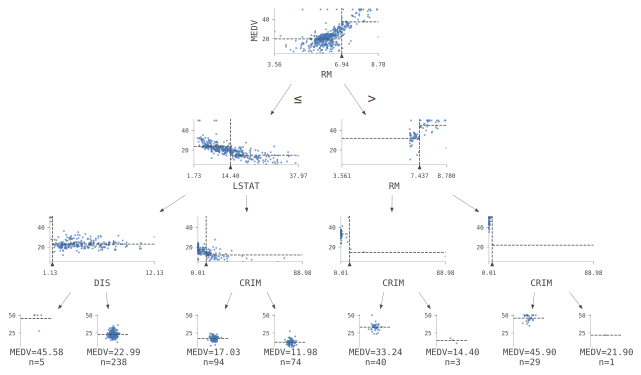

In [21]:
viz = dtreeviz.model(regr, X, y,
                target_name="MEDV",
                feature_names=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'])
viz.view(fontname="monospace")